<center> <font size='6' font-weight='bold'> Nettoyage des données </font> </center>

**Description :** Notebook servant au nettoyage des données.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-données" data-toc-modified-id="Import-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import des données</a></span><ul class="toc-item"><li><span><a href="#Informations-générales" data-toc-modified-id="Informations-générales-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Informations générales</a></span></li><li><span><a href="#Lecture-des-CSV" data-toc-modified-id="Lecture-des-CSV-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lecture des CSV</a></span></li><li><span><a href="#Filtrage-par-noeud" data-toc-modified-id="Filtrage-par-noeud-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filtrage par noeud</a></span></li></ul></li><li><span><a href="#Nettoyage-des-données" data-toc-modified-id="Nettoyage-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nettoyage des données</a></span><ul class="toc-item"><li><span><a href="#NaN" data-toc-modified-id="NaN-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>NaN</a></span></li><li><span><a href="#Conversion-en-datetime64" data-toc-modified-id="Conversion-en-datetime64-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Conversion en datetime64</a></span></li></ul></li><li><span><a href="#Analyse-et-visualisation-(partie-1)" data-toc-modified-id="Analyse-et-visualisation-(partie-1)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyse et visualisation (partie 1)</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Categorical variables</a></span></li><li><span><a href="#Périodes-de-vacances" data-toc-modified-id="Périodes-de-vacances-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Périodes de vacances</a></span></li><li><span><a href="#Features-liées-aux-timestamp" data-toc-modified-id="Features-liées-aux-timestamp-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Features liées aux timestamp</a></span></li><li><span><a href="#Confinement" data-toc-modified-id="Confinement-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Confinement</a></span></li><li><span><a href="#Couvre-feu" data-toc-modified-id="Couvre-feu-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Couvre-feu</a></span></li><li><span><a href="#Jours-fériés" data-toc-modified-id="Jours-fériés-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Jours fériés</a></span></li></ul></li><li><span><a href="#Analyse-et-visualisation-(partie-2)" data-toc-modified-id="Analyse-et-visualisation-(partie-2)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyse et visualisation (partie 2)</a></span></li><li><span><a href="#Export-train-/-dev-/-test" data-toc-modified-id="Export-train-/-dev-/-test-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Export train / dev / test</a></span></li></ul></div>

In [1]:
import os
import datetime

from functools import reduce

import numpy as np
import pandas as pd

import seaborn as sns

Les données sont enregistrées dans 3 fichiers CSV différents. Elles portent le nom suivant :

In [2]:
data_path = './data'

In [3]:
os.listdir(path=data_path)

['convention.csv',
 '.DS_Store',
 'champs-elysees.csv',
 'previsions-meteo-france-metropole.csv',
 'df_dev.csv',
 'jours_feries_metropole.csv',
 'df_test.csv',
 'Sts.csv',
 'df_train.csv']

In [4]:
list_filenames = ['champs-elysees.csv', 'convention.csv', 'Sts.csv']

# Import des données

## Informations générales

**Les données  ont été téléchargées depuis :**  
- https://opendata.paris.fr/explore/dataset/comptages-routiers-permanents/information/?disjunctive.libelle&disjunctive.etat_trafic&disjunctive.libelle_nd_amont&disjunctive.libelle_nd_aval&sort=t_1h  
  
**Lien de la notice d'obtention des features :**  
- https://opendata.paris.fr/api/datasets/1.0/comptages-routiers-permanents/attachments/notice_donnes_trafic_capteurs_permanents_version_20190607_pdf/  
  
**Quelques infos issues du site sur le dataset:**  
>**Données de trafic routier issues des capteurs permanents sur 13 mois glissants en J-1**  
Sur le réseau parisien, la mesure du trafic s’effectue majoritairement par le biais de boucles électromagnétiques implantés dans la chaussée.  
La donnée est produite par la Direction de la Voirie et des déplacements - Service des Déplacements - Poste Central d'Exploitation Lutèce.  
La donnée et les visualisations associées (Tableau, Carte et Dataviz) sont brutes sans aucune interprétation ou analyse. Elles donnent à voir la donnée telle qu'elle est publiée quotidiennement. 
Elles donnent un aperçu du taux d'occupation et du débit sur plus de 3000 tronçons de voies. A elles seules, elles ne permettent pas de caractériser la complexité de la circulation à Paris.  
>  
**Deux types de données sont ainsi élaborés :**
le taux d’occupation, qui correspond au temps de présence de véhicules sur la boucle en pourcentage d’un intervalle de temps fixe (une heure pour les données fournies). Ainsi, 25% de taux d’occupation sur une heure signifie que des véhicules ont été présents sur la boucle pendant 15 minutes. Le taux fournit une information sur la congestion routière. L’implantation des boucles est pensée de manière à pouvoir déduire, d’une mesure ponctuelle, l’état du trafic sur un arc.
le débit est le nombre de véhicules ayant passé le point de comptage pendant un intervalle de temps fixe (une heure pour les données fournies).  
L'horodate horaire est effectué en fin de période d'élaboration. 
Par exemple, l’horodate « 2019-01-01 01:00:00 » désigne la période du 1er janvier 2019 à 00h00 au 1er janvier 2019 à 01h00.  
Ainsi, l’observation couplée en un point du taux d’occupation et du débit permet de caractériser le trafic. Cela constitue l’un des fondements de l’ingénierie du trafic, et l’on nomme d’ailleurs cela le « diagramme fondamental ».
Un débit peut correspondre à deux situations de trafic : fluide ou saturée, d’où la nécessité du taux d’occupation. A titre d’exemple : sur une heure, un débit de 100 véhicules par heure sur un axe habituellement très chargé peut se rencontrer de nuit (trafic fluide) ou bien en heure de pointe (trafic saturé).  
>  
**L’équipement du réseau parisien :**  
Les principaux axes de la Ville de Paris sont équipés de stations de comptage des véhicules et de mesure du taux d’occupation, à des fins à la fois de régulation du trafic et des transports en commun, d’information aux usagers (diffusion sur le site Sytadin), et d’étude.
Il existe deux types de stations sur le réseau : les stations de mesure du taux d’occupation seul, et des stations à la fois de mesure du taux et de comptage des véhicules.
Les stations de mesure du taux sont implantées très régulièrement : elles permettent une connaissance fine des conditions de circulation.
Les stations de débit sont moins nombreuses, et généralement implantées entre les principales intersections. En effet, le débit se conserve généralement sur une section entre deux grands carrefours.

## Lecture des CSV

On regroupera directement toutes les lignes des 3 CSV dans un même DataFrame. Une colonne filename y a été ajoutée pour facilement avoir l'origine de la ligne à portée de main.

In [5]:
df = pd.concat(
    [pd.read_csv(os.path.join(data_path, filename), sep=';', index_col=0).assign(filename=filename) for filename in list_filenames],
               ignore_index=True

)

df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,filename
89322,Convention,2020-01-21T00:00:00+01:00,549.0,8.60889,Fluide,2973,Convention-Blomet,2914,Convention-Vaugirard,Invalide,2005-01-01,2019-06-01,"48.8376043025,2.29547010952","{""type"": ""LineString"", ""coordinates"": [[2.2945...",Sts.csv
96299,Convention,2020-01-16T19:00:00+01:00,307.0,NaN,Inconnu,2974,Convention-Olivier_de_Serres,2914,Convention-Vaugirard,Invalide,2005-01-01,2019-06-01,"48.836994466,2.29718074341","{""type"": ""LineString"", ""coordinates"": [[2.2979...",Sts.csv
103674,Convention,2020-09-16T13:00:00+02:00,NaN,NaN,Inconnu,2965,Convention-Gutemberg,2387,Rond_Point_Mirabeau,Invalide,2005-01-01,2019-06-01,"48.8450383443,2.27928837976","{""type"": ""LineString"", ""coordinates"": [[2.2812...",Sts.csv
11757,Sts_Peres,2020-02-21T18:00:00+01:00,295.0,5.10056,Fluide,120,Bd_St_Germain-Sts_Peres,117,Sts_Peres-Grenelle,Invalide,2005-01-01,2019-06-01,"48.8535840296,2.32988311847","{""type"": ""LineString"", ""coordinates"": [[2.3304...",convention.csv
94145,Convention,2020-04-07T01:00:00+02:00,63.0,0.18111,Fluide,2968,Convention-Felix_Faure,2969,Convention-Croix_Nivert,Invalide,2005-01-01,2019-06-01,"48.8405343369,2.28910566697","{""type"": ""LineString"", ""coordinates"": [[2.2879...",Sts.csv


## Filtrage par noeud

On peut déjà drop les identifiants des noeuds et les données liées à la géométrie car ils ne nous serviront pas pour la suite.  
On supprimera aussi 

In [6]:
df = df.drop(columns=[
    'Identifiant noeud amont', 'Identifiant noeud aval', 'geo_point_2d',
    'geo_shape', 'Date debut dispo data', 'Date fin dispo data'
])

In [7]:
# Contient pour chaque fichier CSV un 2-tuple de la forme (noeud_amont, noeud_aval)
dic_noeuds = {
    'champs-elysees.csv': ('Av_Champs_Elysees-Washington', 'Av_Champs_Elysees-Berri'),
    'convention.csv': ('Lecourbe-Convention', 'Convention-Blomet'),
    'Sts.csv': ('Sts_Peres-Voltaire', 'Sts_Peres-Universite')
}

In [8]:
list_criteria = []
for key, val in dic_noeuds.items():
    criterion = (df['filename']==key) & (df['Libelle noeud amont']==val[0]) & (df['Libelle noeud aval']==val[1])
    list_criteria.append(criterion)

criterion_noeuds = reduce(lambda x, y: x | y, list_criteria)

print(f'Taille du df avant filtrage: {len(df)}')
df = df[criterion_noeuds]
print(f'Taille du df après filtrage: {len(df)}')

Taille du df avant filtrage: 235768
Taille du df après filtrage: 9428


On peut désormais drop les libellés.

In [9]:
df = df.drop(columns=['Libelle noeud amont', 'Libelle noeud aval'])
df.head()

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename
0,AV_Champs_Elysees,2020-11-02T05:00:00+01:00,144.0,2.25611,Fluide,Invalide,champs-elysees.csv
1,AV_Champs_Elysees,2020-11-01T23:00:00+01:00,245.0,8.11222,Fluide,Invalide,champs-elysees.csv
2,AV_Champs_Elysees,2020-07-01T16:00:00+02:00,1138.0,17.86611,Pré-saturé,Invalide,champs-elysees.csv
3,AV_Champs_Elysees,2020-07-01T22:00:00+02:00,880.0,16.03611,Pré-saturé,Invalide,champs-elysees.csv
4,AV_Champs_Elysees,2020-08-05T03:00:00+02:00,487.0,6.35389,Fluide,Invalide,champs-elysees.csv


# Nettoyage des données

In [10]:
df.dtypes

Libelle                       object
Date et heure de comptage     object
Débit horaire                float64
Taux d'occupation            float64
Etat trafic                   object
Etat arc                      object
filename                      object
dtype: object

## NaN

In [11]:
df.isna().sum()

Libelle                       0
Date et heure de comptage     0
Débit horaire                77
Taux d'occupation            85
Etat trafic                   0
Etat arc                      0
filename                      0
dtype: int64

In [12]:
df.isna().mean()

Libelle                      0.000000
Date et heure de comptage    0.000000
Débit horaire                0.008167
Taux d'occupation            0.009016
Etat trafic                  0.000000
Etat arc                     0.000000
filename                     0.000000
dtype: float64

Moins de 1% des lignes ont des NaN. On peut donc drop ces lignes de manière sereine.

In [13]:
df = df.dropna()
df.isna().sum()

Libelle                      0
Date et heure de comptage    0
Débit horaire                0
Taux d'occupation            0
Etat trafic                  0
Etat arc                     0
filename                     0
dtype: int64

## Conversion en datetime64

In [14]:
df['Date et heure de comptage']

0       2020-11-02T05:00:00+01:00
1       2020-11-01T23:00:00+01:00
2       2020-07-01T16:00:00+02:00
3       2020-07-01T22:00:00+02:00
4       2020-08-05T03:00:00+02:00
                  ...            
9423    2020-05-31T20:00:00+02:00
9424    2020-06-01T02:00:00+02:00
9425    2020-06-01T04:00:00+02:00
9426    2020-06-01T01:00:00+02:00
9427    2020-06-01T03:00:00+02:00
Name: Date et heure de comptage, Length: 9343, dtype: object

In [15]:
def remove_timezone(row):
    return row.tz_localize(None)

In [16]:
df['Date et heure de comptage'] = pd.to_datetime(df['Date et heure de comptage'], utc=True)
df['Date et heure de comptage'] = df['Date et heure de comptage'].apply(remove_timezone)
df['Date et heure de comptage']

0      2020-11-02 04:00:00
1      2020-11-01 22:00:00
2      2020-07-01 14:00:00
3      2020-07-01 20:00:00
4      2020-08-05 01:00:00
               ...        
9423   2020-05-31 18:00:00
9424   2020-06-01 00:00:00
9425   2020-06-01 02:00:00
9426   2020-05-31 23:00:00
9427   2020-06-01 01:00:00
Name: Date et heure de comptage, Length: 9343, dtype: datetime64[ns]

In [17]:
df.dtypes

Libelle                              object
Date et heure de comptage    datetime64[ns]
Débit horaire                       float64
Taux d'occupation                   float64
Etat trafic                          object
Etat arc                             object
filename                             object
dtype: object

In [18]:
date_begin = df['Date et heure de comptage'].min().strftime('%d/%m/%Y')
date_end = df['Date et heure de comptage'].max().strftime('%d/%m/%Y')
print(f'Première mesure de comptage prise : {date_begin}')
print(f'Dernière mesure de comptage prise : {date_end}')

Première mesure de comptage prise : 01/11/2019
Dernière mesure de comptage prise : 29/11/2020


# Analyse et visualisation (partie 1)

In [19]:
df[['Débit horaire', "Taux d'occupation"]].describe()

,Débit horaire,Taux d'occupation
count,9343.000000,9343.000000
mean,708.792893,13.150319
std,413.836128,11.412242
min,0.000000,0.000000
25%,300.000000,3.589445
50%,774.000000,10.692220
75%,1072.000000,19.311390
max,1610.000000,84.668890


<AxesSubplot:>

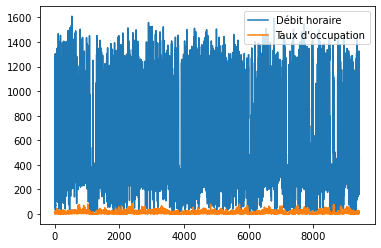

In [20]:
df[['Débit horaire', "Taux d'occupation"]].plot()

<AxesSubplot:ylabel='Débit horaire'>

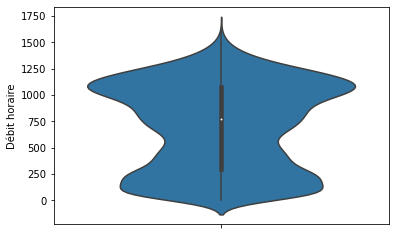

In [21]:
sns.violinplot(y='Débit horaire', data=df)

<AxesSubplot:ylabel="Taux d'occupation">

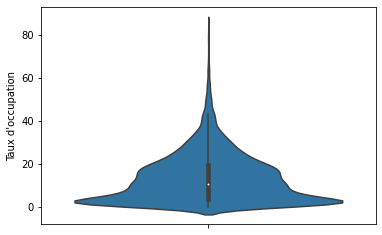

In [22]:
sns.violinplot(y="Taux d'occupation", data=df)

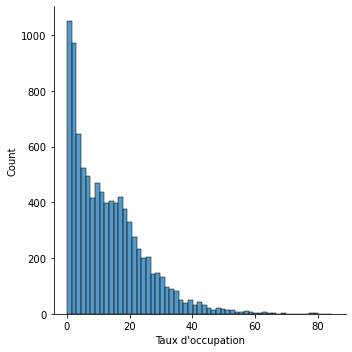

In [23]:
sns.displot(df, x="Taux d'occupation")

# Feature engineering

## Categorical variables

Ajoutons un *one-hot encoding* pour les variables catégoriques. On n'oubliera cependant pas de passer à un *dummy encoding* avant d'entraîner le modèle pour éviter un problème de dimension. ‼️

In [24]:
df.dtypes

Libelle                              object
Date et heure de comptage    datetime64[ns]
Débit horaire                       float64
Taux d'occupation                   float64
Etat trafic                          object
Etat arc                             object
filename                             object
dtype: object

**Ordinal encoding :**

Il semble en réalité plus pertinent d'utiliser un *ordinal encoding* pour donner une relation d'ordre à la feature. On se servira pour cela des informations contenues dans la notice.
<img src="ressources/ordinal_encoding.png" />

In [25]:
 df['Etat trafic']

0           Fluide
1           Fluide
2       Pré-saturé
3       Pré-saturé
4           Fluide
           ...    
9423    Pré-saturé
9424        Fluide
9425        Fluide
9426        Fluide
9427        Fluide
Name: Etat trafic, Length: 9343, dtype: object

In [26]:
# df_ordinal = df.copy(deep=True)
mapper = {'Inconnu': 0, 'Fluide': 1, 'Pré-saturé': 2, 'Saturé': 3, 'Bloqué': 4}
df['Etat trafic'] = df['Etat trafic'].map(mapper)
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename
4588,AV_Champs_Elysees,2020-02-13 16:00:00,1181.0,28.56945,2,Invalide,champs-elysees.csv
4224,AV_Champs_Elysees,2020-10-17 02:00:00,100.0,1.14389,1,Invalide,champs-elysees.csv
8509,AV_Champs_Elysees,2020-05-27 20:00:00,908.0,14.04222,1,Invalide,champs-elysees.csv
3974,AV_Champs_Elysees,2020-06-19 04:00:00,280.0,6.78833,1,Invalide,champs-elysees.csv
768,AV_Champs_Elysees,2019-12-14 06:00:00,633.0,7.45889,1,Invalide,champs-elysees.csv


## Périodes de vacances

In [27]:
first_day_holiday = pd.Timestamp('2020-12-19')
first_day_holiday

Timestamp('2020-12-19 00:00:00')

In [28]:
first_day_holiday - df["Date et heure de comptage"]

0       46 days 20:00:00
1       47 days 02:00:00
2      170 days 10:00:00
3      170 days 04:00:00
4      135 days 23:00:00
              ...       
9423   201 days 06:00:00
9424   201 days 00:00:00
9425   200 days 22:00:00
9426   201 days 01:00:00
9427   200 days 23:00:00
Name: Date et heure de comptage, Length: 9343, dtype: timedelta64[ns]

## Features liées aux timestamp

Ajout du jour (sans l'heure) :

In [29]:
df['Date'] = pd.to_datetime(df["Date et heure de comptage"]).dt.date
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date
9086,AV_Champs_Elysees,2020-01-30 19:00:00,1206.0,23.26389,2,Invalide,champs-elysees.csv,2020-01-30
2334,AV_Champs_Elysees,2020-01-18 06:00:00,528.0,6.77222,1,Invalide,champs-elysees.csv,2020-01-18
1415,AV_Champs_Elysees,2020-02-20 04:00:00,224.0,2.59056,1,Invalide,champs-elysees.csv,2020-02-20
2927,AV_Champs_Elysees,2020-03-06 16:00:00,1147.0,24.60667,2,Invalide,champs-elysees.csv,2020-03-06
5407,AV_Champs_Elysees,2020-05-08 11:00:00,253.0,3.62667,1,Invalide,champs-elysees.csv,2020-05-08


Ajout du jour de la semaine:

In [30]:
df['Jour de la semaine'] = pd.to_datetime(df["Date et heure de comptage"]).dt.dayofweek
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine
9180,AV_Champs_Elysees,2020-05-03 23:00:00,58.0,0.75222,1,Invalide,champs-elysees.csv,2020-05-03,6
8843,AV_Champs_Elysees,2019-11-28 02:00:00,424.0,5.92278,1,Invalide,champs-elysees.csv,2019-11-28,3
6022,AV_Champs_Elysees,2020-04-16 16:00:00,214.0,1.86611,1,Invalide,champs-elysees.csv,2020-04-16,3
2124,AV_Champs_Elysees,2020-07-13 16:00:00,892.0,15.89278,2,Invalide,champs-elysees.csv,2020-07-13,0
7221,AV_Champs_Elysees,2020-04-19 20:00:00,94.0,0.93555,1,Invalide,champs-elysees.csv,2020-04-19,6


## Confinement

D'après Wikipedia:
>L'interdiction de déplacement en France, vulgarisée dans les médias par l'expression « confinement de la population » ou « confinement national », est une mesure sanitaire mise en place pour la première fois du 17 mars à 12 h au 11 mai 2020 (55 jours, soit 1 mois et 25 jours), et une deuxième fois à partir du 30 octobre 2020 au 15 décembre 2020 (soit 1 mois et 18 jours), s'insère dans un ensemble de politiques de restrictions de contacts humains et de déplacements en réponse à la pandémie de Covid-19 en France.

In [31]:
confinement_1 = pd.date_range(start='3/17/2020', end='5/11/2020')
confinement_2 = pd.date_range(start='10/30/2020', end='12/15/2020')

In [32]:
# create a list of our conditions
conditions = [
    (df["Date et heure de comptage"] < confinement_1[0]),
    (confinement_1[0] <= df["Date et heure de comptage"]) & (df["Date et heure de comptage"] < confinement_1[-1]),
    (confinement_1[-1] <= df["Date et heure de comptage"]) & (df["Date et heure de comptage"] < confinement_2[0]),
    (confinement_2[0] <= df["Date et heure de comptage"]) & (df["Date et heure de comptage"] < confinement_2[-1]),
    (confinement_2[-1] <= df["Date et heure de comptage"])
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2, 3, 4]

# create a new column and use np.select to assign values to it using our lists as arguments
df['Etat du confinement'] = np.select(conditions, values)
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine,Etat du confinement
215,AV_Champs_Elysees,2020-10-11 20:00:00,731.0,9.57333,1,Invalide,champs-elysees.csv,2020-10-11,6,2
8270,AV_Champs_Elysees,2020-08-30 01:00:00,943.0,12.67778,1,Invalide,champs-elysees.csv,2020-08-30,6,2
2031,AV_Champs_Elysees,2020-05-23 22:00:00,663.0,8.02334,1,Invalide,champs-elysees.csv,2020-05-23,5,2
5711,AV_Champs_Elysees,2020-11-19 02:00:00,155.0,1.28445,1,Invalide,champs-elysees.csv,2020-11-19,3,3
5864,AV_Champs_Elysees,2020-06-20 23:00:00,1169.0,28.23667,2,Invalide,champs-elysees.csv,2020-06-20,5,2


In [33]:
df['Etat du confinement'].value_counts()

2    4070
0    3217
1    1313
3     743
Name: Etat du confinement, dtype: int64

## Couvre-feu

In [34]:
couvre_feu_start = pd.Timestamp('10/17/2020')
couvre_feu_start

Timestamp('2020-10-17 00:00:00')

In [35]:
df['Couvre-feu'] = (couvre_feu_start <= df['Date'])
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine,Etat du confinement,Couvre-feu
440,AV_Champs_Elysees,2020-11-07 19:00:00,312.0,3.73833,1,Invalide,champs-elysees.csv,2020-11-07,5,3,True
7814,AV_Champs_Elysees,2020-01-24 02:00:00,438.0,5.69500,1,Invalide,champs-elysees.csv,2020-01-24,4,0,False
1560,AV_Champs_Elysees,2020-09-26 08:00:00,772.0,7.99167,1,Invalide,champs-elysees.csv,2020-09-26,5,2,False
1121,AV_Champs_Elysees,2020-04-10 20:00:00,70.0,0.75500,1,Invalide,champs-elysees.csv,2020-04-10,4,1,False
6660,AV_Champs_Elysees,2019-12-19 14:00:00,1053.0,50.79056,4,Invalide,champs-elysees.csv,2019-12-19,3,0,False


## Jours fériés

In [36]:
df_feries = pd.read_csv('data/jours_feries_metropole.csv')
df_feries.head()

,date,annee,zone,nom_jour_ferie
0,2000-01-01,2000,Métropole,1er janvier
1,2000-04-24,2000,Métropole,Lundi de Pâques
2,2000-05-01,2000,Métropole,1er mai
3,2000-05-08,2000,Métropole,8 mai
4,2000-06-01,2000,Métropole,Ascension


In [37]:
# On ne garde que les lignes relatives à 2019 ou 2020
df_feries = df_feries[df_feries['annee'].isin(['2019', '2020'])]
df_feries.sample(5)

,date,annee,zone,nom_jour_ferie
217,2019-11-01,2019,Métropole,Toussaint
212,2019-05-08,2019,Métropole,8 mai
228,2020-11-01,2020,Métropole,Toussaint
221,2020-04-13,2020,Métropole,Lundi de Pâques
230,2020-12-25,2020,Métropole,Jour de Noël


In [38]:
def get_date(row):
    return row.date()

df_feries['date'] = pd.to_datetime(df_feries['date']).apply(get_date)
series_feries = df_feries['date']

In [39]:
df['Jour férié'] = df['Date'].isin(series_feries)
df['Jour férié'].value_counts()

False    9035
True      308
Name: Jour férié, dtype: int64

# Analyse et visualisation (partie 2)

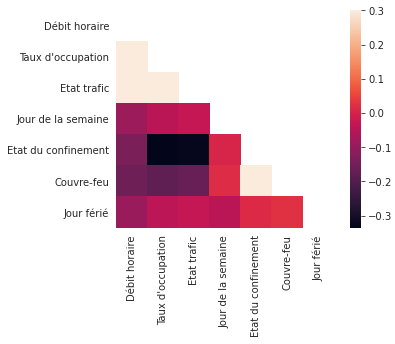

In [40]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

# Export train / dev / test

In [41]:
def get_datasets(df, percentage_train, percentage_dev, percentage_test, seed=None):
    assert(percentage_train + percentage_dev + percentage_test == 1.), 'Please correct the input values.'
    df_train, df_dev, df_test = np.split(
        df.sample(frac=1, random_state=seed),
        [int(percentage_train*len(df)), int((percentage_train+percentage_dev)*len(df))]
    )
    return df_train, df_dev, df_test

In [42]:
percentage_train = 0.8
percentage_dev = 0.1
percentage_test = 0.1

df_train, df_dev, df_test = get_datasets(df, percentage_train, percentage_dev, percentage_test, seed=0)

print(f'% train: {len(df_train) / len(df)}')
print(f'% dev: {len(df_dev) / len(df)}')
print(f'% test: {len(df_test) / len(df)}')

% train: 0.7999571871989725
% dev: 0.09996789039922938
% test: 0.10007492240179813


In [43]:
for df_export, df_filename in zip([df_train, df_dev, df_test], ['df_train.csv', 'df_dev.csv', 'df_test.csv']):
    filepath = os.path.join('data', df_filename)
    df_export.to_csv(filepath)